In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from _common import NUM_LABEL_COLS, RANDOM_SEED
from _tenor_lmsc_brass_ok import TEST_SIZE, VALIDATION_SIZE, \
    BANDS, TIME_SLICES, master, lmss, data, target
# Note that records are read from pickle, selected, filtered,
# and scaled with `sklearn.preprocessing.StandardScaler` 
# in `_tenor_lmsc_brass_ok.py`.

In [3]:
# Just take a quick look at the data
lmss.head()

,lmsc_0_0,lmsc_0_1,lmsc_0_2,lmsc_0_3,lmsc_0_4,lmsc_0_5,lmsc_0_6,lmsc_0_7,lmsc_0_8,lmsc_0_9,...,lmsc_95_86,lmsc_95_87,lmsc_95_88,lmsc_95_89,lmsc_95_90,lmsc_95_91,lmsc_95_92,lmsc_95_93,lmsc_95_94,lmsc_95_95
0,1.302535,-1.517711,-6.141066,-0.763948,-2.188402,-10.345848,-0.869337,-4.913575,-0.623508,-1.354669,...,-47.753479,-47.004150,-48.521458,-48.559227,-42.304115,-45.764694,-48.666260,-38.397888,-48.013229,-46.955753
1,-21.087303,-22.508026,-26.072798,-23.802860,-22.342566,-23.217688,-27.207176,-26.152994,-23.921322,-23.889980,...,-66.836647,-66.836647,-66.836647,-66.836647,-66.836647,-66.836647,-66.836647,-66.836647,-66.836647,-66.836647
4,-7.683798,-10.430683,-6.277548,-19.258242,4.955707,0.455669,-1.133127,-7.922130,-5.916956,-13.067120,...,-61.141048,-61.141048,-61.141048,-61.141048,-61.141048,-61.141048,-61.141048,-61.141048,-61.141048,-61.141048
5,-0.273663,-8.352507,-13.731889,0.191296,0.177858,-9.397446,-4.099616,-10.436550,-12.192333,-13.184113,...,-56.158188,-56.158188,-56.158188,-56.158188,-56.158188,-56.158188,-56.158188,-56.158188,-56.158188,-56.158188
8,2.892120,-18.390614,-7.296602,-4.203867,5.914184,2.309801,-4.366123,3.112412,-5.221383,0.985796,...,-51.250591,-51.250591,-51.250591,-51.250591,-51.250591,-51.250591,-51.250591,-51.250591,-51.250591,-51.250591


In [4]:
print(lmss.shape)
print(data.shape)  # We should have 9,216 = 96 x 96 columns
print(target.shape)

(6683, 9216)
(6683, 9216)
(6683,)


In [5]:
# Reshape for input to 2D convolutional layer
data = data.reshape(data.shape[0], BANDS, TIME_SLICES, 1)

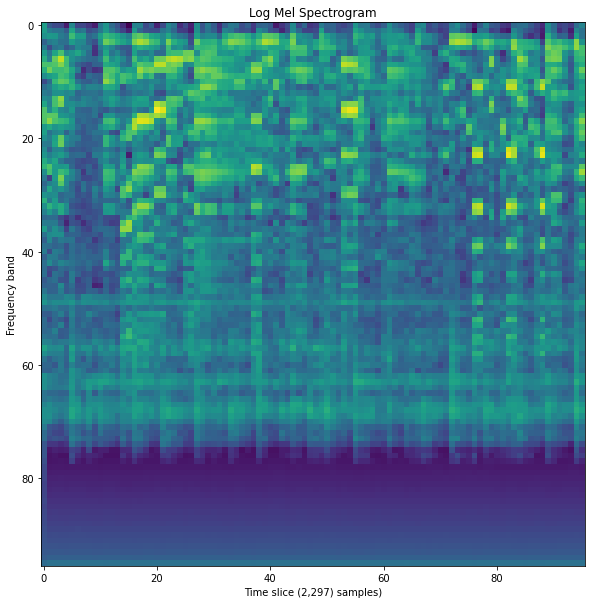

In [6]:
# Plot one data instance
plt.figure(figsize=(10, 10))
plt.xlabel("Time slice (2,297) samples)")
plt.ylabel("Frequency band")
plt.title("Log Mel Spectrogram")
# plt.colorbar()
plt.imshow(data[77, :, :, 0], aspect=1.0)  
# First number in the list ^ is the nth training sample
pass

In [7]:
target = target.astype(np.int)
np.bincount(target)

array([3458, 3225])